## Billionaire's data analysis part -2

1. Is there a correlation between population growth rate and billionaire wealth concentration across countries?
- For this case scenario we use a Pearson correlation test to measure the correlation between population growth rate and billionaire wealth concentration.

In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [24]:
# Loading the dataset
data = pd.read_csv('billionaires_by_country_2024.csv')

bills_data = data.copy()
bills_data.head()

,population_2024,Population_growthRate,Country_land_area,country,region,UNmember,population_density_km,population_densityMi,BillionairesRichestBillionaire2023,BillionairesRichestNetWorth2023,BillionairesPerMillionPeople2023,BillionairesTotalNetWorth2023
0,1441719852,0.00916,3287590.0,India,Asia,True,484.9067,1255.9084,Mukesh Ambani,83.4,0.103,669.2
1,1425178782,-0.00035,9706961.0,China,Asia,True,151.2174,391.6530,Zhong Shanshan,68.0,0.253,1644.7
2,341814420,0.00535,9372610.0,United States,North America,True,37.3673,96.7813,Elon Musk,180.0,1.853,4490.8
3,279798049,0.00816,1904569.0,Indonesia,Asia,True,149.0254,385.9758,Low Tuck Kwong,25.5,0.056,138.4
4,229152217,0.02389,923768.0,Nigeria,Africa,True,251.6027,651.6511,Aliko Dangote,14.2,0.014,28.5


In [30]:
bills_data.isnull().sum()

population_2024                       0
Population_growthRate                 0
Country_land_area                     0
country                               0
region                                0
UNmember                              0
population_density_km                 0
population_densityMi                  0
BillionairesRichestBillionaire2023    0
BillionairesRichestNetWorth2023       0
BillionairesPerMillionPeople2023      0
BillionairesTotalNetWorth2023         5
dtype: int64

In [29]:
# Handle missing or zero values (drop rows or fill with a constant)
bills_data.dropna(subset=['Population_growthRate', 'BillionairesPerMillionPeople2023'], inplace=True)

In [14]:
#Handle any zero or negative values by adding a small constant (like 1)
bills_data['Population_growthRate'] = bills_data['Population_growthRate'].apply(lambda x: x + 1 if x <= 0 else x)
bills_data['BillionairesPerMillionPeople2023'] = bills_data['BillionairesPerMillionPeople2023'].apply(lambda x: x + 1 if x <= 0 else x)

#Apply log transformation to both variables
bills_data['Log_Population_growthRate'] = np.log(bills_data['Population_growthRate'])
bills_data['Log_BillionairesPerMillionPeople2023'] = np.log(bills_data['BillionairesPerMillionPeople2023'])

In [15]:
# Calculate correlation between population growth rate and billionaire wealth concentration
# Here, we are using 'Population_growthRate' and 'BillionairesPerMillionPeople2023' columns

correlation, p_value = pearsonr(bills_data['Log_Population_growthRate'], bills_data['Log_BillionairesPerMillionPeople2023'])

print(f"Log-Transformed Pearson Correlation: {correlation}")
print(f"Log-Transformed P-value: {p_value}")


Log-Transformed Pearson Correlation: -0.07834235130340851
Log-Transformed P-value: 0.4982478970472815


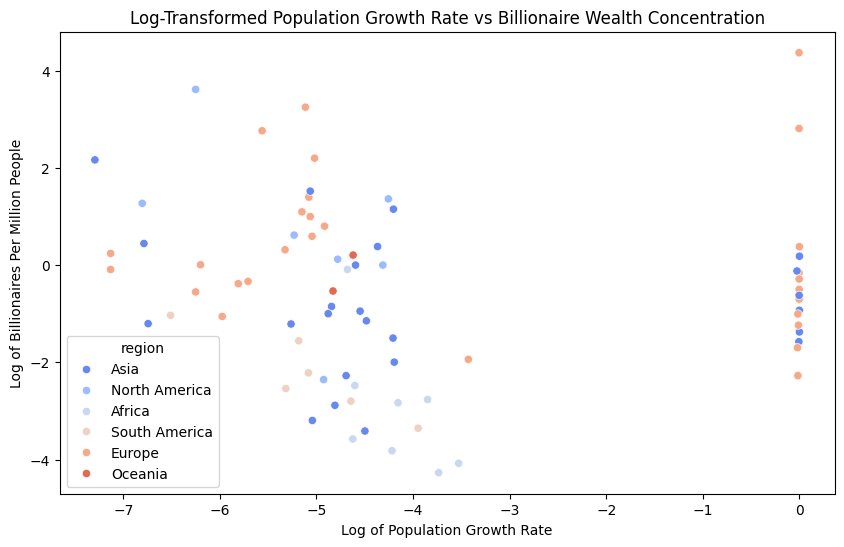

In [16]:
#Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bills_data, x='Log_Population_growthRate', y='Log_BillionairesPerMillionPeople2023', hue='region', palette='coolwarm')
plt.title('Log-Transformed Population Growth Rate vs Billionaire Wealth Concentration')
plt.xlabel('Log of Population Growth Rate')
plt.ylabel('Log of Billionaires Per Million People')
plt.show()

In [17]:
correlation_matrix = bills_data[['Log_Population_growthRate', 'Log_BillionairesPerMillionPeople2023']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                      Log_Population_growthRate  \
Log_Population_growthRate                              1.000000   
Log_BillionairesPerMillionPeople2023                  -0.078342   

                                      Log_BillionairesPerMillionPeople2023  
Log_Population_growthRate                                        -0.078342  
Log_BillionairesPerMillionPeople2023                              1.000000  


Comment:
Log-Transformed Pearson Correlation: -0.078, This indicates a very weak negative linear relationship between Population Growth Rate and Billionaire Wealth Concentration (as measured by Billionaires per Million People).

Log-Transformed P-value: 0.498, which is much higher than the conventional significance level of 0.05. This indicates that the observed correlation is not statistically significant, meaning there is no strong evidence to suggest a real relationship between these two variables.

2. Which regions/countries have the most efficient wealth distribution among billionaires? 
- For this we use inequality metrics, such as the Gini coefficient 

In [35]:
bills_data['BillionairesRichestNetWorth2023'] = bills_data['BillionairesRichestNetWorth2023'].replace(0, np.nan).dropna()
# Gini Co-efficient function
def gini_coef(x):
    x = np.sort(x)  # Sort the values in ascending order
    n = len(x)
    if n == 0:  # Handle case with empty arrays
        return np.nan
    # Cumulative wealth distribution
    cumulative_sum = np.cumsum(x, dtype=float)
    relative_mean_difference = (2 / n) * np.sum((np.arange(1, n + 1) * x)) / np.sum(x) - (n + 1) / n
    return max(0, relative_mean_difference)  # Ensure non-negative values

# Group by region or country and apply the Gini coefficient function to the 'BillionairesRichestNetWorth2023' column
gini_by_region = bills_data.groupby('region')['BillionairesRichestNetWorth2023'].apply(gini_coef).reset_index(name='GiniCoefficient')

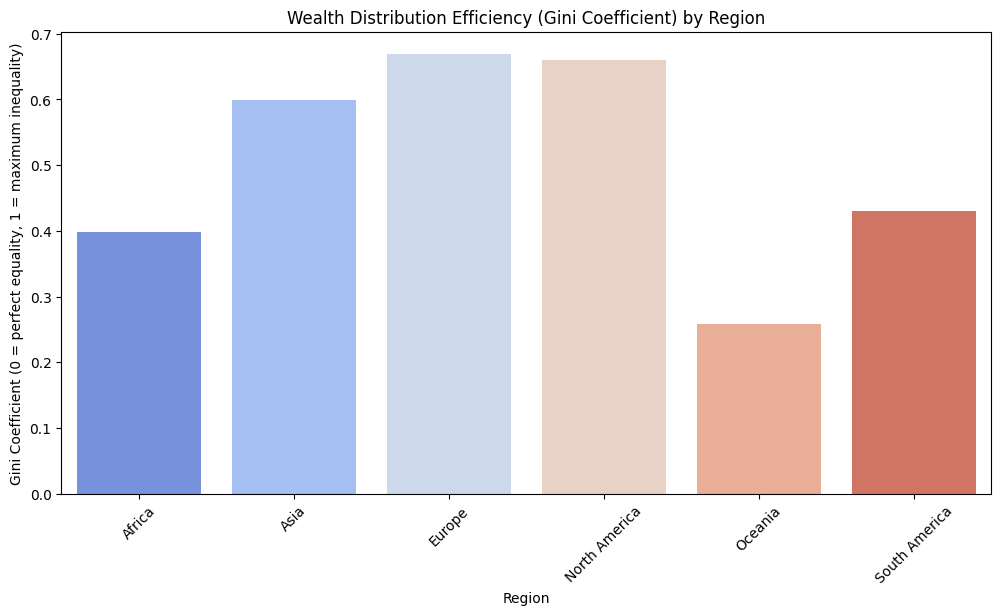

In [37]:
#Visualize the Gini coefficient for wealth distribution by region
plt.figure(figsize=(12, 6))
sns.barplot(data=gini_by_region, x='region', y='GiniCoefficient', palette='coolwarm', hue ='region')
plt.title('Wealth Distribution Efficiency (Gini Coefficient) by Region')
plt.xlabel('Region')
plt.ylabel('Gini Coefficient (0 = perfect equality, 1 = maximum inequality)')
plt.xticks(rotation=45)
plt.show()

In [36]:
gini_by_region

,region,GiniCoefficient
0,Africa,0.398614
1,Asia,0.599441
2,Europe,0.669534
3,North America,0.659616
4,Oceania,0.258427
5,South America,0.429701


Comment: For oceania wealth is most equally distributed.
Africa, South Ameria has moderate inequality.
Asia, North America adn Europe have higher inequality.
Oceania stands out with the most efficient (equal) wealth distribution, while Europe shows the highest concentration of wealth.

3. Does higher population density lead to a greater concentration of billionaires per capita?
- For this we will calculate the correlation between population density and the number of billionaires per million people. This will help determine if there's a relationship between these two variables.

In [39]:
# Apply log transformation to population density and billionaires per capita to handle skewed data
bills_data['Log_PopulationDensity'] = np.log(bills_data['population_density_km'] + 1)  # Adding 1 to avoid log(0)
bills_data['Log_BillionairesPerMillion'] = np.log(bills_data['BillionairesPerMillionPeople2023'] + 1)  # Adding 1 to avoid log(0)

# Calculate the Pearson correlation between log-transformed variables
correlation, p_value = pearsonr(bills_data['Log_PopulationDensity'], bills_data['Log_BillionairesPerMillion'])

# Print correlation and p-value
print(f"Log-Transformed Pearson Correlation: {correlation}")
print(f"Log-Transformed P-value: {p_value}")

Log-Transformed Pearson Correlation: 0.3588643463237186
Log-Transformed P-value: 0.0013506735788271138


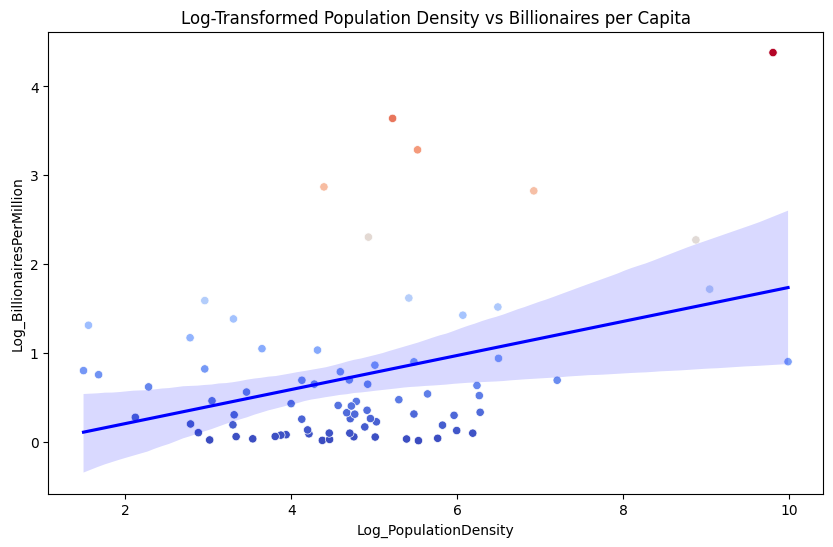

In [41]:
#Visualize the relationship between log-transformed population density and billionaires per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bills_data, x='Log_PopulationDensity', y='Log_BillionairesPerMillion', hue='Log_BillionairesPerMillion', palette='coolwarm', legend=False)
plt.title('Log-Transformed Population Density vs Billionaires per Capita')
plt.xlabel('Log of Population Density (per km²)')
plt.ylabel('Log of Billionaires per Million People')

# Step 8: Add a regression line to visualize the trend
sns.regplot(data=bills_data, x='Log_PopulationDensity', y='Log_BillionairesPerMillion', scatter=False, color='blue')
plt.show()

Comment: 
Log-Transformed Pearson Correlation: 0.359.
This indicates a moderate positive correlation between log-transformed population density and log-transformed billionaires per million people. This suggests that as population density increases, the concentration of billionaires per capita also tends to increase.

Log-Transformed P-value: 0.001.
The p-value is significantly less than 0.05, indicating that the correlation is statistically significant. This means there is strong evidence to suggest that the observed relationship is not due to random chance.